In [34]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt 

# 2-D Truss Stiffness

The following code shows how to create a (1) local stiffness matrix for a truss element (2) a local to global map (3) assemble the global system matrix 

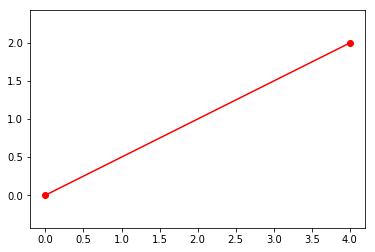

In [51]:
# The coordinates of each node 
p1 = np.array([0.,0.])
p2 = np.array([4.,2.])
coordinates = {0:p1,1:p2}
plt.plot([p1[0],p2[0]],[p1[1],p2[1]],'-ro')
plt.axis('equal')
plt.show()

The element dictionary contains for each element the product of the cross sectional area times the 
Young's modulus, the global node index corresponding to the local `i` and `j` nodes.

In [52]:
# Create the element dictionary.  
elements = {} 
elements[0] = {'AE':5.**3, 'i':0, 'j':1}

In [54]:
# The local stiffness matrix
# @param[in] element the element dictionary
# @param[in] crds the coordinates dictionary
# @param[in] e the element number
# @return the local stiffness matrix
def local_stiffness(elts,crds,e):
    # Compute the director vector between the nodes 
    n = crds[elts[e]['j']] - crds[elts[e]['i']]
    # Compute the lenght of the element
    L = la.norm(n)
    # Normalize the director vector 
    n /= L
    # Compute the stiffness tensor
    ke = elts[e]['AE']/L*np.outer(n,n)
    # Compute the stiffness matrix
    Ke = np.block([[ke,-ke], [-ke,ke]])
    return Ke

In [55]:
# Get the local stiffness matrix 
Ke = local_stiffness(elements,coordinates,0)
print(Ke)

[[ 22.36067977  11.18033989 -22.36067977 -11.18033989]
 [ 11.18033989   5.59016994 -11.18033989  -5.59016994]
 [-22.36067977 -11.18033989  22.36067977  11.18033989]
 [-11.18033989  -5.59016994  11.18033989   5.59016994]]


In [39]:
# Test internal forces 
u1 = np.array([0.,1.])
u2 = np.array([5.,-2.])
u = np.array([u1,u2]).flatten()

In [56]:
# Print internal forces
print( np.dot(Ke,u) )

[ 6.76845306  3.38422653 -6.76845306 -3.38422653]


## Let's look at the eigenvalues

In [41]:
# Get the eigenvalues of the stiffness matrix
eigenvalues, eigenvectors = la.eig(Ke)
print('Eigenvalues:',eigenvalues)
print('Eigenvectors:\n',eigenvectors)

Eigenvalues: [0.00000000e+00 4.41941738e+01 8.75811540e-47 1.48777521e-30]
Eigenvectors:
 [[-0.8660254  -0.5        -0.8660254   0.58583209]
 [ 0.28867513 -0.5         0.28867513 -0.79660978]
 [-0.28867513  0.5        -0.28867513 -0.10538885]
 [-0.28867513  0.5        -0.28867513 -0.10538885]]


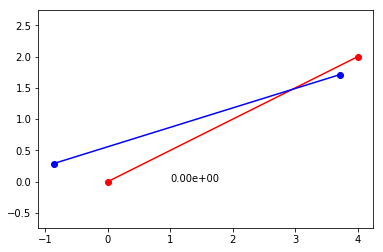

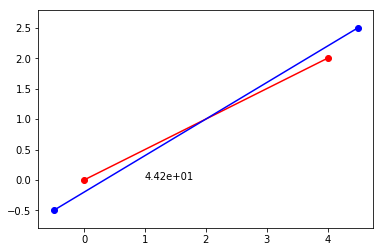

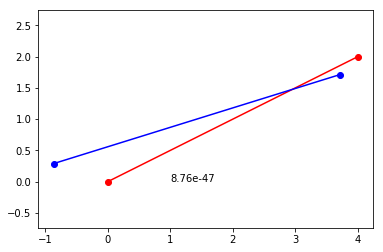

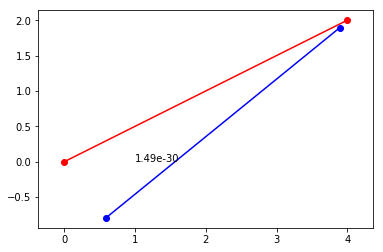

In [57]:
# Plot the eigenvectors
for i_idx,i in enumerate(eigenvalues):
    u = eigenvectors[:,i_idx]
    for e in elements:
        elt = elements[e]
        plt.plot([coordinates[elt['i']][0],coordinates[elt['j']][0]],[coordinates[elt['i']][1],coordinates[elt['j']][1]],'-ro' )
        plt.plot([coordinates[elt['i']][0] + u[0],coordinates[elt['j']][0]+u[2]],[coordinates[elt['i']][1]+u[1],coordinates[elt['j']][1]+u[3]],'-bo' )
        plt.text(coordinates[elt['i']][0]+1,coordinates[elt['i']][1],'%.2e'%i)
        plt.ylim([-1,5])
        plt.xlim([-1,5])
        plt.axis('equal')
        plt.show()